In [15]:
import csv
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

In [16]:
ps = pd.read_csv('patch_seq_log_mouse.csv')

In [17]:
ps = ps[["Date", "File", "Post patch?", "Time spent extracting cytosol", "patch duration", ">400", "SM_QC_PF", "Bad dates"]]
ps["Time spent extracting cytosol"] = pd.to_numeric(ps["Time spent extracting cytosol"].str.replace(' ',''), errors ='coerce')
ps.dropna(subset = ["Post patch?", "Time spent extracting cytosol", "patch duration", "SM_QC_PF"], inplace = True)
ps["SM_QC_PF"] = ps["SM_QC_PF"].astype("category")
ps["Post patch?"] = ps["Post patch?"].astype("category")
ps["patch duration"] = pd.to_numeric(ps["patch duration"].str.replace(' ',''), errors ='force')
ps[">400"] = pd.to_numeric(ps[">400"].str.replace(' ',''), errors ='force')
ps["Date"] = pd.to_datetime(ps["Date"], format = '%y%m%d')
ps = ps[ps["SM_QC_PF"] != "cnt"]
ps = ps[ps["Bad dates"] != "x"]
ps = ps.drop("Bad dates", 1)
ps = ps[ps[">400"] < 10000]
ps.head()

,Date,File,Post patch?,Time spent extracting cytosol,patch duration,>400,SM_QC_PF
29,2016-04-07,Ndnf - kjh_160407_03,Nucleated patch,5.0,8.0,96.00,pass
30,2016-04-07,Ndnf - kjh_160407_04,Partial-Nucleus,5.0,7.0,111.00,pass
31,2016-04-07,Ndnf - kjh_160407_05,Entire-Cell?,5.0,7.0,27.30,fail
32,2016-04-07,Ndnf - kjh_160407_06,Outside-Out,5.0,7.0,18.76,fail
33,2016-04-07,Ndnf - kjh_160407_07,Outside-Out,2.0,4.0,100.00,pass


In [18]:
ps["Post patch?"].value_counts()

Outside-Out                       779
Nucleated                         562
No-Seal                           543
Partial-Nucleus                   307
Entire-Cell                        25
no-seal                             4
Entire-Cell?                        2
outside-out                         1
nucleus                             1
nucelated                           1
no -seal                            1
n                                   1
leaky Outside-Out                   1
Nucleated patch                     1
Nucleated (maybe Entire-Cell?)      1
dtype: int64

# 4/20/2017 was first day of 21 PCR cycles.  Should be using PCR cycles column to do this filtering 

In [19]:
ps = ps[ps["Date"] >= "2017-04-20"]
#ps.head()
ps["Post patch?"].value_counts()

Nucleated                         362
No-Seal                           305
Partial-Nucleus                   123
Outside-Out                        58
Entire-Cell                         9
outside-out                         0
nucleus                             0
nucelated                           0
no-seal                             0
no -seal                            0
n                                   0
leaky Outside-Out                   0
Nucleated patch                     0
Nucleated (maybe Entire-Cell?)      0
Entire-Cell?                        0
dtype: int64

In [6]:
#ps["Time spent extracting cytosol"].sort_values()

In [7]:
#ps["Time spent extracting cytosol"].value_counts()

# Plot of >400bp concentration vs extraction time by post patch outcomes

'\ndef fit_plots(x,y,c):\n    z = np.polyfit(x,y,1)\n    p = np.poly1d(z)\n    plt.plot(x,p(x),c)\n    \nfit_plots(x1,y1,"r")\nfit_plots(x2,y2,"g")\nfit_plots(x3,y3,"b")\nfit_plots(x4,y4,"y")\n'

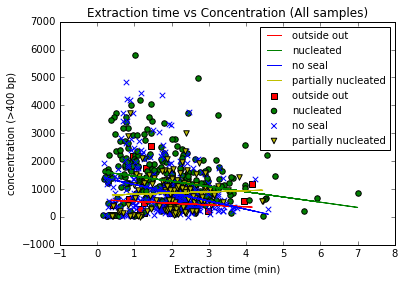

In [75]:
mask1 = ps["Post patch?"] == "Outside-Out"
mask2 = ps["Post patch?"] == "Nucleated"
mask3 = ps["Post patch?"] == "No-Seal"
mask4 = ps["Post patch?"] == "Partial-Nucleus"
mask5 = ps["Post patch?"] == "Entire-Cell"
oo = ps[mask1]
nu = ps[mask2]
ns = ps[mask3]
pn = ps[mask4]
ec = ps[mask5]

x1 = oo["Time spent extracting cytosol"]
y1 = oo[">400"]
x2 = nu["Time spent extracting cytosol"]
y2 = nu[">400"]
x3 = ns["Time spent extracting cytosol"]
y3 = ns[">400"]
x4 = pn["Time spent extracting cytosol"]
y4 = pn[">400"]

def make_plots(x,y,c,m,l):
    plt.scatter(x,y,s=30,c=c,marker=m,label=l)
    z = np.polyfit(x,y,1)
    p = np.poly1d(z)
    plt.plot(x,p(x),c=c,label=l)
    
make_plots(x1,y1,"r","s","outside out")
make_plots(x2,y2,"g","o","nucleated")
make_plots(x3,y3,"b","x","no seal")
make_plots(x4,y4,"y","v","partially nucleated")

plt.title('Extraction time vs Concentration (All samples)')
plt.xlabel('Extraction time (min)')
plt.ylabel('concentration (>400 bp)')

plt.legend(scatterpoints=1,loc='upper right',ncol=1,fontsize=10)

'''
def fit_plots(x,y,c):
    z = np.polyfit(x,y,1)
    p = np.poly1d(z)
    plt.plot(x,p(x),c)
    
fit_plots(x1,y1,"r")
fit_plots(x2,y2,"g")
fit_plots(x3,y3,"b")
fit_plots(x4,y4,"y")
'''

# Filtering down to SMQC passing samples only

In [23]:
ps_pass = ps[ps["SM_QC_PF"] == "pass"]
ps_pass.head()

,Date,File,Post patch?,Time spent extracting cytosol,patch duration,>400,SM_QC_PF,cytosol extraction time bins
4737,2017-04-20,Vip-IRES-Cre;Ai14-313534.03.01.01,Nucleated,2.366667,3.766667,894.0,pass,2
4738,2017-04-20,Vip-IRES-Cre;Ai14-313534.03.01.02,No-Seal,2.700000,6.766667,376.0,pass,2
4739,2017-04-20,Vip-IRES-Cre;Ai14-313534.03.01.03,No-Seal,1.983333,10.250000,338.0,pass,1
4740,2017-04-20,Vip-IRES-Cre;Ai14-313534.03.01.04,No-Seal,1.933333,3.816667,518.0,pass,1
4741,2017-04-20,Vip-IRES-Cre;Ai14-313534.03.01.05,No-Seal,1.750000,6.083333,439.0,pass,1


# Plot of >400bp concentration vs extraction time by post patch outcomes - SMQC passing samples only

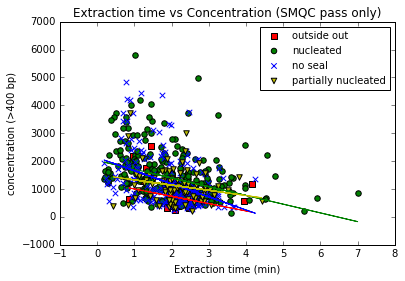

In [71]:
oo = ps_pass[ps_pass["Post patch?"] == "Outside-Out"]
nu = ps_pass[ps_pass["Post patch?"] == "Nucleated"]
ns = ps_pass[ps_pass["Post patch?"] == "No-Seal"]
pn = ps_pass[ps_pass["Post patch?"] == "Partial-Nucleus"]
ec = ps_pass[ps_pass["Post patch?"] == "Entire-Cell"]

x1 = oo["Time spent extracting cytosol"]
y1 = oo[">400"]
x2 = nu["Time spent extracting cytosol"]
y2 = nu[">400"]
x3 = ns["Time spent extracting cytosol"]
y3 = ns[">400"]
x4 = pn["Time spent extracting cytosol"]
y4 = pn[">400"]

def make_plots(x,y,c,m,l):
    plt.scatter(x,y,s=30,c=c,marker=m,label=l)

make_plots(x1,y1,"r","s","outside out")
make_plots(x2,y2,"g","o","nucleated")
make_plots(x3,y3,"b","x","no seal")
make_plots(x4,y4,"y","v","partially nucleated")

plt.title('Extraction time vs Concentration (SMQC pass only)')
plt.xlabel('Extraction time (min)')
plt.ylabel('concentration (>400 bp)')

def fit_plots(x,y,c):
    z = np.polyfit(x,y,1)
    p = np.poly1d(z)
    plt.plot(x,p(x),c)

fit_plots(x1,y1,"r")
fit_plots(x2,y2,"g")
fit_plots(x3,y3,"b")
fit_plots(x4,y4,"y")    

plt.legend(scatterpoints=1,loc='upper right',ncol=1,fontsize=10)

plt.savefig('extraction_vs_conc.png',dpi=300)

# Putting extraction times into 1 minute time bins 

In [42]:
ps["cytosol extraction time bins"] = ps["Time spent extracting cytosol"].astype(int)
ps.info()
#ps["cytosol extraction time bins"].sort_values()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857 entries, 4737 to 6064
Data columns (total 8 columns):
Date                             857 non-null datetime64[ns]
File                             857 non-null object
Post patch?                      857 non-null category
Time spent extracting cytosol    857 non-null float64
patch duration                   856 non-null float64
>400                             857 non-null float64
SM_QC_PF                         857 non-null category
cytosol extraction time bins     857 non-null int32
dtypes: category(2), datetime64[ns](1), float64(3), int32(1), object(1)
memory usage: 45.3+ KB


# Functions for getting pass percentages by time bins 

In [66]:
def timebin(x):
    time_bin = ps[ps["cytosol extraction time bins"] == x]
    return time_bin

def timebin_total(x):
    bin_total = x["cytosol extraction time bins"].count()
    return bin_total

def timebin_pass(x):
    timebin_pass = x[x["SM_QC_PF"] == "pass"]
    pass_total = timebin_pass["SM_QC_PF"].count()
    return pass_total

def timebin_pp(x):
    timebin_pp = float(timebin_pass(x)) / float(timebin_total(x))
    return timebin_pp

# 0-1 Minute Extraction 

In [44]:
print "Total count =", timebin_total(timebin(0))
print "Pass count =", timebin_pass(timebin(0))
print "Pass percentage =", timebin_pp(timebin(0))

Total count = 137
Pass count = 92
Pass percentage = 0.671532846715


# 1-2 Minute Extraction 

In [48]:
print "Total count =", timebin_total(timebin(1))
print "Pass count =", timebin_pass(timebin(1))
print "Pass percentage =", timebin_pp(timebin(1))

Total count = 293
Pass count = 223
Pass percentage = 0.761092150171


# 2-3 Minute Extraction

In [49]:
print "Total count =", timebin_total(timebin(2))
print "Pass count =", timebin_pass(timebin(2))
print "Pass percentage =", timebin_pp(timebin(2))

Total count = 353
Pass count = 277
Pass percentage = 0.784702549575


# 3-4 Minute Extraction

In [50]:
print "Total count =", timebin_total(timebin(3))
print "Pass count =", timebin_pass(timebin(3))
print "Pass percentage =", timebin_pp(timebin(3))

Total count = 60
Pass count = 47
Pass percentage = 0.783333333333


# 4-5 Minute Extraction

In [64]:
print "Total count =", timebin_total(timebin(4))
print "Pass count =", timebin_pass(timebin(4))
print "Pass percentage =", timebin_pp(timebin(4))

Total count = 11
Pass count = 8
Pass percentage = 0.727272727273


# 5-6 Minute Extraction

In [65]:
print "Total count =", timebin_total(timebin(5))
print "Pass count =", timebin_pass(timebin(5))
print "Pass percentage =", timebin_pp(timebin(5))

Total count = 2
Pass count = 2
Pass percentage = 1.0


In [45]:
zero_one = ps[ps["cytosol extraction time bins"] == 0]
z_1_total = zero_one["cytosol extraction time bins"].count()
z_1_total

137

In [46]:
zero_one_pass = zero_one[zero_one["SM_QC_PF"] == "pass"]
z_1_pass = zero_one_pass["SM_QC_PF"].count()
z_1_pass

92

In [47]:
z_1_pp = float(z_1_pass) / z_1_total
print "0 to 1 minute pass percentage =", z_1_pp

0 to 1 minute pass percentage = 0.671532846715


In [51]:
one_two = ps[ps["cytosol extraction time bins"] == 1]
o_2_total = one_two["cytosol extraction time bins"].count()
o_2_total

293

In [52]:
one_two_pass = one_two[one_two["SM_QC_PF"] == "pass"]
o_2_pass = one_two_pass["SM_QC_PF"].count()
o_2_pass

223

In [53]:
o_2_pp = float(o_2_pass) / o_2_total
print "1 to 2 minute pass percentage =", o_2_pp

1 to 2 minute pass percentage = 0.761092150171


In [54]:
two_three = ps[ps["cytosol extraction time bins"] == 2]
t_3_total = two_three["cytosol extraction time bins"].count()
t_3_total

353

In [55]:
two_three_pass = two_three[two_three["SM_QC_PF"] == "pass"]
t_3_pass = two_three_pass["SM_QC_PF"].count()
t_3_pass

277

In [56]:
t_3_pp = float(t_3_pass) / t_3_total
print "two to three minute pass percentage =", t_3_pp

two to three minute pass percentage = 0.784702549575


In [57]:
three_four = ps[ps["cytosol extraction time bins"] == 3]
t_4_total = three_four["cytosol extraction time bins"].count()
t_4_total

60

In [58]:
three_four_pass = three_four[three_four["SM_QC_PF"] == "pass"]
t_4_pass = three_four_pass["SM_QC_PF"].count()
t_4_pass

47

In [59]:
t_4_pp = float(t_4_pass) / t_4_total
print "three to fourt minute pass percentage =", t_4_pp

three to fourt minute pass percentage = 0.783333333333


In [60]:
four_five = ps[ps["cytosol extraction time bins"]  == 4]
f_5_total = four_five["cytosol extraction time bins"].count()
f_5_total

11

In [61]:
four_five_pass = four_five[four_five["SM_QC_PF"] == "pass"]
f_5_pass = four_five_pass["SM_QC_PF"].count()
f_5_pass

8

In [62]:
f_5_pp = float(f_5_pass) / f_5_total
print "four to five minute pass percentage =", f_5_pp

four to five minute pass percentage = 0.727272727273


In [63]:
five_six = ps[ps["cytosol extraction time bins"] == 5]
f_5_total = five_six["cytosol extraction time bins"].count()
f_5_total

2